In [ ]:
pip install wandb

In [21]:
# Importing necessary libraries
from keras.datasets import fashion_mnist  # Importing Fashion MNIST dataset from Keras
import numpy as np  # Importing NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib library for plotting
import wandb
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib
import seaborn as sns
import pandas

In [3]:
!wandb login 57566fbb0e091de2e298a4320d872f9a2b200d12

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DELL\.netrc


In [30]:
wandb.init(project="DL_Assignment1", name="Question:1")

<Artifact source-DL_Assignment1-None>

# **Question-1**

In [22]:
#loading data set
(fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label) = fashion_mnist.load_data()
(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = mnist.load_data()


In [23]:
# Checking Dataset shape
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# type(x_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
# x_train.shape

def input_matrix(image):
    """
    Reshape and normalize input images.

    Parameters:
    - image: Input image

    Returns:
    - Reshaped and normalized input matrix
    """
    return image.reshape(image.shape[0], -1) / 255.0


In [24]:
# class labels for fashion mnist dataset
label_fahion_mnist = {
     0 :  "T-shirt/top",
     1 :  "Trouser",
     2 :  "Pullover",
     3 :  "Dress",
     4 :  "Coat",
     5 :  "Sandal",
     6 :  "Shirt",
     7 :  "Sneaker",
     8 :  "Bag",
     9 :  "Ankle boot"
}

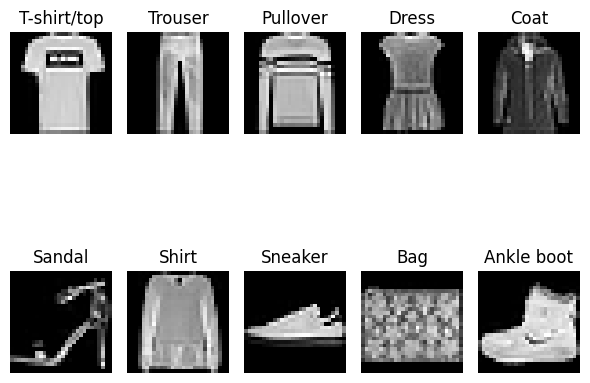

In [25]:
# Creating subplots to display one image of each class
fig, axes = plt.subplots(2, 5, figsize=(6, 6))

# Iterating through each class
for i in range(len(label_fahion_mnist)):
    row = i // 5  # Calculating row index for subplot
    col = i % 5   # Calculating column index for subplot

    # Finding the index of the first image in the training set with label i
    idx = np.argmax(fashion_mnist_train_label == i)

    # Displaying the image corresponding to the label i
    axes[row, col].imshow(fashion_mnist_train[idx], cmap='gray')  # Displaying grayscale image
    axes[row, col].set_title(label_fahion_mnist[i])  # Setting title with class label
    axes[row, col].axis('off')  # Turning off axis

    # wandb.log({"Question1": [wandb.Image(fashion_mnist_train[idx], caption= label_fahion_mnist[i])]})

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
wandb.finish()

# **Activation Functions**

In [26]:
""" Activation Class :- Contains various diffrent activations functions """
class Activation_Functions:
    def __init__(self) -> None:
        pass


    def sigmoid(self, x):
        # Compute sigmoid element-wise for each element of the matrix
        sigmoid_x = np.zeros_like(x)  # Initialize output matrix with zeros

        # Apply the sigmoid function element-wise
        positive_mask = x >= 0
        sigmoid_x[positive_mask] = 1.0 / (1.0 + np.exp(-x[positive_mask]))
        sigmoid_x[~positive_mask] = np.exp(x[~positive_mask]) / (1.0 + np.exp(x[~positive_mask]))

        return sigmoid_x


    def ReLU(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)



    def softmax(self, x):
        # Subtract the maximum value along the axis to prevent overflow
        max_x = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - max_x)

        # Compute softmax probabilities
        softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)

        return softmax_x

    def identity(self, x):
        return x



    def activation(self, x, fun):
        if fun == "tanh":
            return self.tanh(x)
        elif fun == "sigmoid":
            return self.sigmoid(x)
        elif fun == "ReLU":
            return self.ReLU(x)
        elif fun == "softmax":
            return self.softmax(x)
        elif fun == "identity":
            return self.identity(x)

# **Derivatives**

In [27]:
class Derivatives:
    def __init__(self) -> None:
        """
            Constructor method for Derivatives class.
            Initialization of object of Activation_Functions class
        """
        self.fun = Activation_Functions()  # Creating an instance of Activation_Functions class


    def sigmoid_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.sigmoid(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative

    def softmax_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.softmax(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative


    def tanh_derivative(self, x):
        """
        Computes the derivative of the hyperbolic tangent (tanh) activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the tanh activation function
        """
        g = self.fun.tanh(x)  # Computing tanh activation
        return 1 - g * g  # Computing and returning derivative


    def ReLU_derivative(self, x):
        """
        Computes the derivative of the Rectified Linear Unit (ReLU) activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the ReLU activation function
        """
        # g = self.fun.ReLU(x)  # Computing ReLU activation
        # return np.where(g > 0, 1, 0)  # Computing and returning derivative

        x[x>0]=1
        x[x<=0]=0
        return x

    def identity_derivative(self, x):
        x = 1
        return x


    def derivatives(self, x, activation_function):
        """
        Computes the derivative of a specified activation function.

        Parameters:
        - x: Input value
        - activation_function: Name of the activation function

        Returns:
        - Derivative of the specified activation function
        """
        if activation_function == "sigmoid":
            return self.sigmoid_derivative(x)  # Computing derivative for sigmoid activation
        elif activation_function == "tanh":
            return self.tanh_derivative(x)  # Computing derivative for tanh activation
        elif activation_function == "ReLU":
            return self.ReLU_derivative(x)  # Computing derivative for ReLU activation
        elif activation_function == "softmax":
            return self.softmax_derivative(x)
        elif activation_function == "identity":
            return self.identity_derivative(x)


# **Loss Functions**

In [28]:
class Loss_Function:
    def __init__(self) -> None:
        """
        Constructor method for Loss_Function class.
        Initializes the default loss function to cross-entropy.
        """
        self.default_loss_function = "cross_entropy"


    def compute_loss(self, y_true, y_hat, loss_function):
        """
        Computes the loss based on the given true labels and predicted probabilities.

        Parameters:
        - y_true: True labels (one-hot encoded)
        - y_hat: Predicted probabilities
        - loss_function: Name of the loss function to be used

        Returns:
        - Loss value
        """


        if loss_function == None:
            # If no loss function is specified, use the default loss function
            loss_function = self.default_loss_function

        if loss_function == "cross_entropy":
            # Set a small value epsilon to avoid numerical instability
            epsilon = 1e-15
            # Clip the predicted values to avoid log(0) and log(1) scenarios
            y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
            # Compute the cross-entropy loss for each sample
            loss = -np.sum(y_true * np.log(y_hat), axis=1)
            # Compute the mean loss across all samples
            loss = np.mean(loss)
            # Return the computed loss
            return loss

        if loss_function == "mean_squared_error":
            loss = (1/2) * np.sum((y_true-y_hat)**2) / (y_hat.shape[0])
            return loss


    def last_output_derivative(self, y_hat,y_true, activation_derivative, loss_function):

        # epsilon = 1e-15
        #     # Clip the predicted values to avoid log(0) and log(1) scenarios
        # y_hat = np.clip(y_hat, epsilon, 1. - epsilon)

        if(loss_function == "mean_squared_error"):
            # print(y_hat.shape, y_true.shape)
            return (y_hat - y_true)* activation_derivative/ len(y_true)

        if(loss_function == "cross_entropy"):
            return -(y_true - y_hat)



# **Question - 2**

In [29]:
class Network:
    def __init__(self, PARAM):
        """
        Constructor method for Network class.

        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layers, output size)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store activations of each layer
        self.h = {}       # Dictionary to store outputs of each layer
        self.fun = Activation_Functions()  # Instance of Activation_Functions class
        self.size_list = [PARAM["input_size"]] + PARAM["hidden_layers"] + [PARAM["output_size"]]  # List containing sizes of all layers
        self.y_predictions = []  # List to store predicted probabilities for each input sample


    def initialize_parameters(self, initialization):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
            if initialization == "random":
                self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
            elif initialization == "Xavier":
                inpt_w = self.size_list[layer-1]
                opt_w = self.size_list[layer]
                inpt_b = 1
                opt_b = self.size_list[layer]

                variance_w = 2.0/(inpt_w + opt_w)
                variance_b = 2.0/(inpt_b + opt_b)

                self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)  # Initializing biases with random values





    def forward_pass(self, x, activation_function):
        """
        Method to perform forward pass through the network.

        Parameters:
        - x: Input data
        - activation_function: Name of the activation function to be used

        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        total_layer = len(self.size_list)
        self.h[0] = x  # Input layer

        for layer in range(1, total_layer-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing preactivation
            self.h[layer] = self.fun.activation(self.a[layer], fun=activation_function)  # Applying activation function

        self.a[total_layer-1] = np.dot(self.h[layer], self.weight[total_layer-1]) + self.bias[total_layer-1]  # Computing weighted sum for final layer
        self.h[total_layer-1] = self.fun.activation(self.a[total_layer-1], fun="softmax")  # Applying softmax activation

        return self.h[total_layer-1]  # Returning output of final layer


    def predict_probability(self, dataset, activation, init):
        """
        Method to predict probabilities for each input sample in the dataset.

        Parameters:
        - dataset: Input dataset
        - activation: Name of the activation function to be used

        Returns:
        - List containing predicted probabilities for each input sample
        """
        self.initialize_parameters(init)  # Initializing network parameters

        for image in dataset:
            x = image.reshape(1, -1) / 255.0  # Reshaping and normalizing input data
            y_hat = self.forward_pass(x, activation)  # Performing forward pass
            self.y_predictions.append(y_hat)  # Storing predicted probabilities

        return self.y_predictions  # Returning list of predicted probabilities



In [30]:
PARAM = {
    "input_size" : 784,            # Size of the input layer (number of input features)
    "hidden_layers" : [5, 6, 7],   # Sizes of hidden layers in the neural network
    "output_size" : 10             # Size of the output layer (number of classes)
}

n1 = Network(PARAM)  # Creating an instance of the Network class with the given parameters
y_pred = n1.predict_probability(fashion_mnist_train, "identity", "Xavier")  # Predicting probabilities for each sample in the training dataset using sigmoid activation function



In [31]:
np.set_printoptions(suppress=True)  # Suppressing scientific notation in printed arrays
print(y_pred[0])  # Printing the predicted probabilities for the first sample

[[0.01683554 0.02133968 0.10342524 0.02196297 0.00586741 0.62099497
  0.00481974 0.04859029 0.13855858 0.01760557]]


# **Question - 3**

# **Optimizers**

In [32]:
class Optimizer:
    def __init__(self, neural_network, PARAM) -> None:
        """
        Constructor method for Optimizer class.

        Parameters:
        - neural_network: Instance of the neural network class
        - PARAM: Dictionary containing optimization parameters (eta, weight_decay, optimizer, beta)
        """
        self.neural_network = neural_network  # Neural network object
        self.eta = PARAM["eta"]  # Learning rate
        self.weight_decay = PARAM["weight_decay"]  # Weight decay factor
        self.optimizer = PARAM["optimizer"]  # Optimization algorithm (sgd, momentum, nag, adam, nadam, rmsprop)
        self.beta = PARAM["beta"]  
        self.epsilon = PARAM["epsilon"] 
        self.beta2 = PARAM["beta2"] 
        self.beta1 = PARAM["beta1"]
        self.momentum = PARAM["momentum"] # Momentum factor for momentum-based optimization

    def stochastic_gradient_decent(self):
        """
        Method to perform stochastic gradient descent optimization.
        """
        weight_decay = self.weight_decay
        eta = self.eta

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.weight[layer] = self.neural_network.weight[layer] - eta * self.neural_network.grad_w[layer]  # Updating weights
            self.neural_network.bias[layer] = self.neural_network.bias[layer] - eta * self.neural_network.grad_b[layer]  # Updating biases

    def update(self, t):
        """
        Method to update network parameters based on the selected optimization algorithm.
        """
        if self.optimizer == "sgd":
            self.stochastic_gradient_decent()
        elif self.optimizer == "momentum":
            self.momentum_based_gradient_decent()
        elif self.optimizer == "nag":
            self.nesterov_accelerated_gradient_decent()
        elif self.optimizer == "rmsprop":
            self.rmsprop()
        elif self.optimizer == "adam":
            self.adam(t)
        elif self.optimizer == "nadam":
            self.nadam(t)


    def momentum_based_gradient_decent(self):
        """
        Method to perform momentum-based gradient descent optimization.
        """
        weight_decay = self.weight_decay

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
                decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
                self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

                uw = self.momentum * self.neural_network.prv_w[layer] + self.eta * self.neural_network.grad_w[layer]  # Computing update for weights
                ub = self.momentum * self.neural_network.prv_b[layer] + self.eta * self.neural_network.grad_b[layer]  # Computing update for biases

                self.neural_network.weight[layer] -= uw  # Updating weights
                self.neural_network.bias[layer] -= ub  # Updating biases

                self.neural_network.prv_w[layer] = uw  # Storing previous weight update
                self.neural_network.prv_b[layer] = ub  # Storing previous bias update


    def nesterov_accelerated_gradient_decent(self):
        """
        Method to perform Nesterov Accelerated Gradient Descent optimization.
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.prv_w[layer] = self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]

            self.neural_network.weight[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]))
            self.neural_network.bias[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]))

    def rmsprop(self):
        """
        Method to perform Root Mean Square Propogation optimization.
        """
        for layer in range(len(self.neural_network.size_list) - 1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * (self.neural_network.grad_b[layer] ** 2)

            self.neural_network.weight[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_w[layer] + self.epsilon))) * self.neural_network.grad_w[layer]
            self.neural_network.bias[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_b[layer] + self.epsilon))) * self.neural_network.grad_b[layer]


    def adam(self, t):
        """
        Method to perform adam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]


            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * m_w_hat
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * m_b_hat


    def nadam(self, t):
        """
        Method to perform nadam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]

            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * (self.beta * m_w_hat + ((1 - self.beta1) * self.neural_network.grad_w[layer])/(1 - self.beta1 ** t))
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * (self.beta * m_b_hat + ((1 - self.beta1) * self.neural_network.grad_b[layer])/(1 - self.beta1 ** t))










# **Neural Network**

In [34]:
class Neural_Network:
    def __init__(self, PARAM) -> None:
        """
        Constructor method for Neural_Network class.

        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layer sizes, output size,
                 activation function, training input, training output)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store preactivation of each layer
        self.h = {}       # Dictionary to store activations of each layer
        self.grad_w = {}  # Dictionary to store gradients of weights for each layer
        self.grad_b = {}  # Dictionary to store gradients of biases for each layer
        self.prv_w = {}   # Dictionary to store previous weights for momentum-based optimization
        self.prv_b = {}   # Dictionary to store previous biases for momentum-based optimization
        self.prv2_w = {}
        self.prv2_b = {}

        self.activation_function = PARAM["activation_function"]  # Activation function for hidden layers
        self.loss_function = PARAM["loss_function"]  # Activation function for hidden layers
        self.initialization = PARAM["init"] # initialization type
        self.hidden_layers = PARAM["hidden_layers"]
        self.hidden_layer_sizes = PARAM["hidden_layer_sizes"]
        self.dataset = PARAM["dataset"]
        
        self.act = Activation_Functions()  # Instance of Activation_Functions class
        self.derivative = Derivatives()     # Instance of Derivatives class
        self.loss = Loss_Function()         # instance of Loss_Function class

        

        if self.dataset == 'fashion_mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label)
        if self.dataset == 'mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (mnist_train, mnist_train_label), (mnist_test, mnist_test_label)
        
        #train - test split 
        train_image, validation_image, train_label, validation_label = train_test_split(train_img, train_lbl, test_size= 0.1, random_state=41)
        
        # training data
        self.input = input_matrix(train_image)
        self.y_true = train_label

        # validation data
        self.val_img = input_matrix(validation_image)
        self.val_true = validation_label

        #testing data
        self.test_img = input_matrix(test_img)
        self.test_true = test_lbl

        self.size_list = [self.input.shape[1]] + [self.hidden_layer_sizes for _ in range(self.hidden_layers)] + [10]  # Sizes of all layers


    def initialize_parameters(self):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):

            self.prv_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero
            self.prv2_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv2_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero

            for layer in range(1, len(self.size_list)):
                if self.initialization == "random":
                    self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                    self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
                    # print("Initialize with random")
                elif self.initialization == "Xavier":
                    inpt_w = self.size_list[layer-1]
                    opt_w = self.size_list[layer]
                    inpt_b = 1
                    opt_b = self.size_list[layer]

                    variance_w = 6.0/(inpt_w + opt_w)
                    variance_b = 6.0/(inpt_b + opt_b)

                    self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                    self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)

                    # print("Initialize with xavier")


    def forward_propagation(self, x):
        """
        Method to perform forward propagation through the network.

        Parameters:
        - x: Input data

        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        self.h[0] = x  # Input layer
        for layer in range(1, len(self.size_list)-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing weighted sum of inputs
            self.h[layer] = self.act.activation(self.a[layer], self.activation_function)  # Applying activation function
        self.a[layer+1] = np.dot(self.h[layer], self.weight[layer+1]) + self.bias[layer+1]  # Computing weighted sum for final layer
        self.h[layer+1] = self.act.activation(self.a[layer+1], "softmax")  # Applying softmax activation
        return self.h[layer+1]  # Returning output of final layer


    def backward_propagation(self, input, y_true, y_hat):
        """
        Method to perform backward propagation through the network.

        Parameters:
        - input: Input data
        - y_true: True labels
        - y_hat: Predicted probabilities

        Returns:
        - Gradients of weights and biases
        """

        activation_derivative = self.derivative.derivatives(self.a[len(self.size_list) - 1], "softmax")
        error_wrt_output = self.loss.last_output_derivative(y_hat, y_true, activation_derivative, self.loss_function)

        for layer in range(len(self.size_list)-1, 1, -1):
            self.grad_w[layer] = np.dot(self.h[layer-1].T, error_wrt_output)  # Computing gradients of weights
            self.grad_b[layer] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases

            error_wrt_hidden = np.dot(error_wrt_output, self.weight[layer].T)  # Computing error with respect to hidden layer
            error_wrt_output = error_wrt_hidden * self.derivative.derivatives(self.a[layer-1], self.activation_function)  # Computing error with respect to output of hidden layer

        self.grad_w[1] = np.dot(input.T, error_wrt_output)  # Computing gradients of weights for input layer
        self.grad_b[1] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases for input layer

        return self.grad_w, self.grad_b  # Returning gradients of weights and biases


    def one_hot_vector(self, y_true):
        """
        Method to convert true labels into one-hot vectors.

        Parameters:
        - y_true: True labels

        Returns:
        - One-hot vector representation of true labels
        """
        vec = np.zeros(10)  # Initializing one-hot vector
        vec[y_true] = 1  # Setting the corresponding index to 1
        return vec


    def one_hot_matrix(self, y_true):
        """
        Method to convert true labels into one-hot matrices.

        Parameters:
        - y_true: True labels

        Returns:
        - One-hot matrix representation of true labels
        """
        row = y_true.shape[0]  # Number of samples
        col = 10  # Number of classes
        mat = np.zeros((row, col))  # Initializing one-hot matrix
        for i in range(row):
            mat[i][y_true[i]] = 1  # Setting the corresponding index to 1
        return mat


# Train Model

In [35]:
class Train_Model:
    def __init__(self, neural_network, optimizer, log, console = 1) -> None:
        """
        Constructor method for Train_Model class.

        Parameters:
        - PARAM_NEURAL_NETWORK: Dictionary containing parameters for the neural network
        - PARAM_OPTIMIZER: Dictionary containing parameters for the optimizer
        """
        self.neural_network =neural_network  # Neural network instance
        self.optimizer = optimizer  # Optimizer instance
        self.loss = Loss_Function()  # Loss function instance
        self.wan_log = log          
        self.console_log = console

    def compute_performance(self, data, label):
        """
            Method to compute loss and accuracy
            Parameters :
                data : predicted class
                label : true class
            Returns:
                loss, accuracy (in %)
        """
        y_predictions = self.neural_network.forward_propagation(data)
        #creating one hot matrix true data
        labels = self.neural_network.one_hot_matrix(label)
        # accuracy calculation
        accuracy = np.sum(np.argmax(y_predictions, axis=1) == np.argmax(labels, axis = 1))
        #loss calculation
        loss = self.loss.compute_loss(labels, y_predictions, self.neural_network.loss_function)
        return loss, (accuracy/len(data)) * 100

    def predict_prob(self, data):
        """
            Method to compute loss and accuracy
            Parameters :
                data : image
            Returns:
                predicted probabilities assigned to each class
        """
        y_predictions = self.neural_network.forward_propagation(data)
        return y_predictions

    def fit_data(self, batch_size, epochs):
        """
        Method to train the model on the given dataset.

        Parameters:
        - batch_size: Size of each batch
        - epochs: Number of epochs for training
        """
        self.neural_network.initialize_parameters()  # Initializing parameters of the neural network
        total_batches = int(np.ceil(self.neural_network.input.shape[0] / batch_size))  # Total number of batches
        for i in range(epochs):
            t = 1
            for batch in range(total_batches):
                batch_start = batch * batch_size  # Starting index of the batch
                batch_end = batch_start + batch_size  # Ending index of the batch
                image_set = self.neural_network.input[batch_start : batch_end]  # Extracting batch of input images
                res_set = self.neural_network.y_true[batch_start : batch_end]  # Extracting batch of true labels


                y_hat = self.neural_network.forward_propagation(image_set)  # Forward propagation
                res = self.neural_network.one_hot_matrix(res_set)  # Converting true labels into one-hot matrices
                grad_w , grad_b = self.neural_network.backward_propagation(image_set, res, y_hat)  # Backward propagation

                for layer in range(1, len(self.neural_network.size_list)):
                    self.neural_network.grad_w[layer] = grad_w[layer]/batch_size  # Normalizing gradients of weights
                    self.neural_network.grad_b[layer] = grad_b[layer]/batch_size  # Normalizing gradients of biases

                self.optimizer.update(t)  # Updating weights and biases using optimizer
                t += 1

            t_loss, t_acc = self.compute_performance(self.neural_network.input, self.neural_network.y_true)
            v_loss, v_acc = self.compute_performance(self.neural_network.val_img, self.neural_network.val_true)

            if self.wan_log == 1:
                wandb.log({
                    'epoch' : i+1,
                    'training-loss' : t_loss,
                    'training-accuracy' : t_acc,
                    'validation-loss' : v_loss,
                    'validation-accuracy' : v_acc,

                })

            if self.console_log == 1:
                print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
                print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch


        return t_loss, t_acc, v_loss, v_acc




# **Training & Testing**

In [36]:

PARAM_NEURAL_NETWORK = {
    "hidden_layers": 5,
    "hidden_layer_sizes" : 128,
    "activation_function": "tanh", # sigmoid, tanh, ReLU
    "dataset" : "fashion_mnist",
    "loss_function" : "mean_squared_error", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

PARAM_OPTIMIZER = {
    "eta": 0.0005,
    "optimizer": "nadam", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0.0005,
    "epsilon": 1e-6,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}

neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

my_model = Train_Model(neural_network, optimizer, log = 0)
my_model.fit_data(batch_size=64, epochs=1)


epoch:1 :: 
 Training-loss : 0.3281222061817706, Training-accuracy:60.09074074074074%
Validation-loss : 0.32996820522877063, Validation-accuracy:59.3%




(0.3281222061817706, 60.09074074074074, 0.32996820522877063, 59.3)

In [ ]:
# testing 

test_data = input_matrix(fashion_mnist_test)
y_pred1 = my_model.neural_network.forward_propagation(test_data)
# y_pred2 = n2.forward_propogation(test_data, "tanh")
accuracy1 = np.mean(np.argmax(y_pred1, axis = 1) == fashion_mnist_test_label)
# accuracy2 = np.mean(np.argmax(y_pred2, axis = 1) == y_train)

print(accuracy1)
print(np.unique(np.argmax(y_pred1, axis = 1)))

# **Question 4**

In [37]:
sweep_config = {
    'method' : 'random',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'sweep1_random_final',

    'parameters' : {
        'epochs' : {'values' : [5, 10]},
        'activation' : {'values' : ['identity', 'tanh', 'sigmoid', 'ReLU']},
        'batch_size' : {'values' : [32, 64, 128]},
        'optimizer' : {'values' : ['momentum','sgd', 'nag', 'nadam', 'adam', 'rmsprop']},
        'weight_decay': {'values': [0, 0.0005]},
        'hidden_layer_sizes' : {'values' : [32, 64, 128]},
        'beta': {'values': [0.5, 0.9]}, #rmsprop
        'beta1' : {'values' : [0.9, 0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [0.0005]},
        'initialization':{'values': ['Xavier', 'random']},
        'hidden_layers': {'values': [3, 4, 5]},
        'loss_function' : {'values' : ['cross_entropy', 'mean_squared_error']},
        'epsilon' : {'values' : [1e-6, 1e-8]},
        'momentum' : {'values' : [0.5, 0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [38]:
def train():
    var1 = wandb.init(project="DL_Assignment1")
    var2 = var1.config

    # wandb.run.name = 'Optimizer:- ' + var2.optimizer + ' Epoch:- ' + str(var2.epochs) + " Avtivation_Function :- " + var2.activation + " Batch_Size :- " + str(var2.batch_size) + " Initialization :- " + var2.initialization + \
    #                 ' layers:-' + str(len(var2.hidden_layers)) +' decay:-' + str(var2.weight_decay) + ' beta:-' + str(var2.beta) + ' learning_rate:-' + str(var2.learning_rate) + \
    #                 ' beta2 :- ' + str(var2.beta)

    wandb.run.name = f"hl_{var2.hidden_layers}_bs_{var2.batch_size}_e_{var2.epochs}_act_{var2.activation}_eta_{var2.learning_rate}_err_{var2.loss_function}_init_{var2.initialization}_hls_{var2.hidden_layer_sizes}_dataset_{var2.dataset}"

    PARAM_NEURAL_NETWORK = {
        "hidden_layers": var2.hidden_layers,
        "hidden_layer_sizes" : var2.hidden_layer_sizes,
        "activation_function": var2.activation, # sigmoid, tanh, ReLU
        "loss_function" : var2.loss_function, # mean_squared_error, cross_entropy
        "init" : var2.initialization, #random, xavier
        "dataset" : var2.dataset
    }

    PARAM_OPTIMIZER = {
        "eta": var2.learning_rate,
        "optimizer": var2.optimizer, #sgd, momentum, adam, nadam, rmsprop, nag
        "beta": var2.beta,
        "weight_decay": var2.weight_decay,
        "epsilon": var2.epsilon,
        "beta2" : var2.beta2,
        "beta1" : var2.beta1,
        "momentum" : var2.momentum
    }

    neural_network1 = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer1 = Optimizer(neural_network1, PARAM_OPTIMIZER)

    my_model1 = Train_Model(neural_network1, optimizer1, log = 1)
    t_loss, t_acc, v_loss, v_acc = my_model1.fit_data(batch_size=var2.batch_size, epochs=var2.epochs)

    print(f"Training-loss : {t_loss}, Training-accuracy:{t_acc}%, Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%")    # Printing loss and accuracy for each epoch
    loss, accuracy = my_model1.compute_performance(neural_network1.val_img, neural_network1.val_true)
    print(loss, accuracy)
    wandb.log({"Accuracy" : accuracy})


In [39]:
sweep_id = wandb.sweep(sweep_config, project="DL_Assignment1")

Create sweep with ID: y61i31f9
Sweep URL: https://wandb.ai/harsh_cs23m026/DL_Assignment1/sweeps/y61i31f9


In [40]:
wandb.agent(sweep_id, train, count = 5)
wandb.finish()

wandb: Agent Starting Run: oes5jtnc with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch:1 :: 
 Training-loss : 1.49935257100207, Training-accuracy:52.727777777777774%
Validation-loss : 1.509162224950178, Validation-accuracy:52.800000000000004%


epoch:2 :: 
 Training-loss : 1.016534303650929, Training-accuracy:67.00555555555555%
Validation-loss : 1.0361600475374566, Validation-accuracy:65.53333333333333%


epoch:3 :: 
 Training-loss : 0.8241755358241873, Training-accuracy:71.61666666666666%
Validation-loss : 0.8421186260054352, Validation-accuracy:70.13333333333334%


epoch:4 :: 
 Training-loss : 0.7358020112451136, Training-accuracy:74.09074074074074%
Validation-loss : 0.7500978727802758, Validation-accuracy:73.36666666666667%


epoch:5 :: 
 Training-loss : 0.6832031564505382, Training-accuracy:75.88333333333334%
Validation-loss : 0.6940642212785103, Validation-accuracy:75.13333333333333%


epoch:6 :: 
 Training-loss : 0.6468064411924235, Training-accuracy:77.21296296296296%
Validation-loss : 0.6545967841555321, Validation-accuracy:76.95%


epoch:7 :: 
 Training-lo

Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▆▇▇▇███
training-loss,█▄▃▂▂▂▁▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▄▃▂▂▂▁▁▁▁
Accuracy,80.43333
epoch,10
training-accuracy,80.1537
training-loss,0.55889
validation-accuracy,80.43333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l3rx1l5q with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch:1 :: 
 Training-loss : 1.1820398254862976, Training-accuracy:63.18333333333334%
Validation-loss : 1.1855815392545554, Validation-accuracy:62.483333333333334%


epoch:2 :: 
 Training-loss : 0.9521057428970979, Training-accuracy:69.8648148148148%
Validation-loss : 0.9565577238545757, Validation-accuracy:69.15%


epoch:3 :: 
 Training-loss : 0.8419051413179636, Training-accuracy:72.86851851851853%
Validation-loss : 0.8458594157520902, Validation-accuracy:72.21666666666667%


epoch:4 :: 
 Training-loss : 0.7733644737854667, Training-accuracy:74.69259259259259%
Validation-loss : 0.777302070931738, Validation-accuracy:73.81666666666666%


epoch:5 :: 
 Training-loss : 0.7254427395709153, Training-accuracy:76.12222222222222%
Validation-loss : 0.7295845837108633, Validation-accuracy:75.26666666666667%


Training-loss : 0.7254427395709153, Training-accuracy:76.12222222222222%, Validation-loss : 0.7295845837108633, Validation-accuracy:75.26666666666667%
0.7295845837108633 75.26666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▃▂▁
Accuracy,75.26667
epoch,5
training-accuracy,76.12222
training-loss,0.72544
validation-accuracy,75.26667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ey60tfgx with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch:1 :: 
 Training-loss : 0.9003327008464841, Training-accuracy:9.966666666666667%
Validation-loss : 0.8969960174584668, Validation-accuracy:10.299999999999999%


epoch:2 :: 
 Training-loss : 0.8998148147844232, Training-accuracy:10.018518518518519%
Validation-loss : 0.901666666661707, Validation-accuracy:9.833333333333332%


epoch:3 :: 
 Training-loss : 0.8998148147844099, Training-accuracy:10.018518518518519%
Validation-loss : 0.9016666666617041, Validation-accuracy:9.833333333333332%


epoch:4 :: 
 Training-loss : 0.8998148147843967, Training-accuracy:10.018518518518519%
Validation-loss : 0.9016666666617013, Validation-accuracy:9.833333333333332%


epoch:5 :: 
 Training-loss : 0.8998148147843834, Training-accuracy:10.018518518518519%
Validation-loss : 0.9016666666616986, Validation-accuracy:9.833333333333332%


Training-loss : 0.8998148147843834, Training-accuracy:10.018518518518519%, Validation-loss : 0.9016666666616986, Validation-accuracy:9.833333333333332%
0.9016666666616986 

Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁████
training-loss,█▁▁▁▁
validation-accuracy,█▁▁▁▁
validation-loss,▁████
Accuracy,9.83333
epoch,5
training-accuracy,10.01852
training-loss,0.89981
validation-accuracy,9.83333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pfk0lzrb with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch:1 :: 
 Training-loss : 0.5051126672454703, Training-accuracy:9.983333333333333%
Validation-loss : 0.5041019887851523, Validation-accuracy:10.15%


epoch:2 :: 
 Training-loss : 0.5012116656803507, Training-accuracy:9.983333333333333%
Validation-loss : 0.500221202494603, Validation-accuracy:10.15%


epoch:3 :: 
 Training-loss : 0.4977654928580159, Training-accuracy:9.983333333333333%
Validation-loss : 0.49679448734536724, Validation-accuracy:10.15%


epoch:4 :: 
 Training-loss : 0.49471124843407754, Training-accuracy:9.983333333333333%
Validation-loss : 0.4937589900662806, Validation-accuracy:10.15%


epoch:5 :: 
 Training-loss : 0.4919947625661064, Training-accuracy:9.983333333333333%
Validation-loss : 0.4910605855415228, Validation-accuracy:10.15%


Training-loss : 0.4919947625661064, Training-accuracy:9.983333333333333%, Validation-loss : 0.4910605855415228, Validation-accuracy:10.15%
0.4910605855415228 10.15


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▄▂▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▂▁
Accuracy,10.15
epoch,5
training-accuracy,9.98333
training-loss,0.49199
validation-accuracy,10.15


wandb: Agent Starting Run: q9wlkkxq with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


epoch:1 :: 
 Training-loss : 0.5254535578897785, Training-accuracy:9.966666666666667%
Validation-loss : 0.5245962304658615, Validation-accuracy:10.299999999999999%


epoch:2 :: 
 Training-loss : 0.5251167163092091, Training-accuracy:9.966666666666667%
Validation-loss : 0.5242652340274389, Validation-accuracy:10.299999999999999%


epoch:3 :: 
 Training-loss : 0.5247840937794711, Training-accuracy:9.966666666666667%
Validation-loss : 0.5239383911061436, Validation-accuracy:10.299999999999999%


epoch:4 :: 
 Training-loss : 0.5244555715923203, Training-accuracy:9.966666666666667%
Validation-loss : 0.5236155841639673, Validation-accuracy:10.299999999999999%


epoch:5 :: 
 Training-loss : 0.5241310355445069, Training-accuracy:9.966666666666667%
Validation-loss : 0.5232967001438633, Validation-accuracy:10.299999999999999%


Training-loss : 0.5241310355445069, Training-accuracy:9.966666666666667%, Validation-loss : 0.5232967001438633, Validation-accuracy:10.299999999999999%
0.5232967001438633

Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▄▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▃▁
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.52413
validation-accuracy,10.3


# **Question - 7**

In [42]:
PARAM_NEURAL_NETWORK = {
    "hidden_layers": 5,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier", #random, Xavier
    "dataset" : "fashion_mnist"
}

PARAM_OPTIMIZER = {
    "eta": 0.001, #0.0006
    "optimizer": "nadam", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0,
    "epsilon": 1e-6, #1e-8
    "beta2" : 0.999,  # 0.9
    "beta1" : 0.999,
    "momentum" : 0.9 #0.5
}


nn = Neural_Network(PARAM_NEURAL_NETWORK)
opt = Optimizer(nn, PARAM_OPTIMIZER)

model = Train_Model(nn, opt, log = 0)
training_loss, training_acc, validation_loss, validation_acc = model.fit_data(batch_size=64, epochs=5)

epoch:1 :: 
 Training-loss : 0.564950192644765, Training-accuracy:79.87407407407407%
Validation-loss : 0.5760708371736699, Validation-accuracy:79.38333333333333%


epoch:2 :: 
 Training-loss : 0.4590873064587748, Training-accuracy:83.62037037037037%
Validation-loss : 0.4722155986454591, Validation-accuracy:82.93333333333334%


epoch:3 :: 
 Training-loss : 0.41162413509200957, Training-accuracy:85.35185185185186%
Validation-loss : 0.4233419149781611, Validation-accuracy:84.98333333333333%


epoch:4 :: 
 Training-loss : 0.3877503142317187, Training-accuracy:86.10185185185185%
Validation-loss : 0.40829022407751675, Validation-accuracy:85.3%


epoch:5 :: 
 Training-loss : 0.3624822182938119, Training-accuracy:86.93703703703703%
Validation-loss : 0.38400694848834405, Validation-accuracy:86.11666666666666%




In [43]:
y_pred = model.predict_prob(model.neural_network.test_img)
print(model.compute_performance(model.neural_network.test_img, model.neural_network.test_true))
# print(y_pred.shape)
# print(y_pred[0])

(0.4152868256382829, 85.27)


In [44]:
def create_confusion_matrix(y_pred, y_true):
    mat = np.zeros((y_pred.shape[1], y_pred.shape[1]))
    class_pred = np.argmax(y_pred, axis = 1)
    print(class_pred)
    for i in range(y_true.shape[0]):
        mat[y_true[i]][class_pred[i]] += 1
    mat = mat.astype(int)
    print(type(mat))
    return mat

In [46]:
def plot_confusion_matrix(dataset):
    wandb.init(project="DL_Assignment1", name="Question:7")
    class_label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    if dataset == 'mnist':
        class_label = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    mat = create_confusion_matrix(y_pred, model.neural_network.test_true)
    df_confusion = pandas.DataFrame(mat, index=class_label, columns=class_label)
    plt.figure(figsize=(10, 10))
    # my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow"])
    ax = sns.heatmap(df_confusion, annot=True, fmt='g',linewidths=4, linecolor='white')
    ax.set_xticklabels(class_label,rotation=90)
    ax.set_yticklabels(class_label,rotation=0)
    plt.title('Confusion Matrix', fontsize=8)
    plt.ylabel("Predicted Class")
    plt.xlabel("True Class")
    wandb.log({"Confusion_Matrix": wandb.Image(plt)})
    wandb.finish()

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>


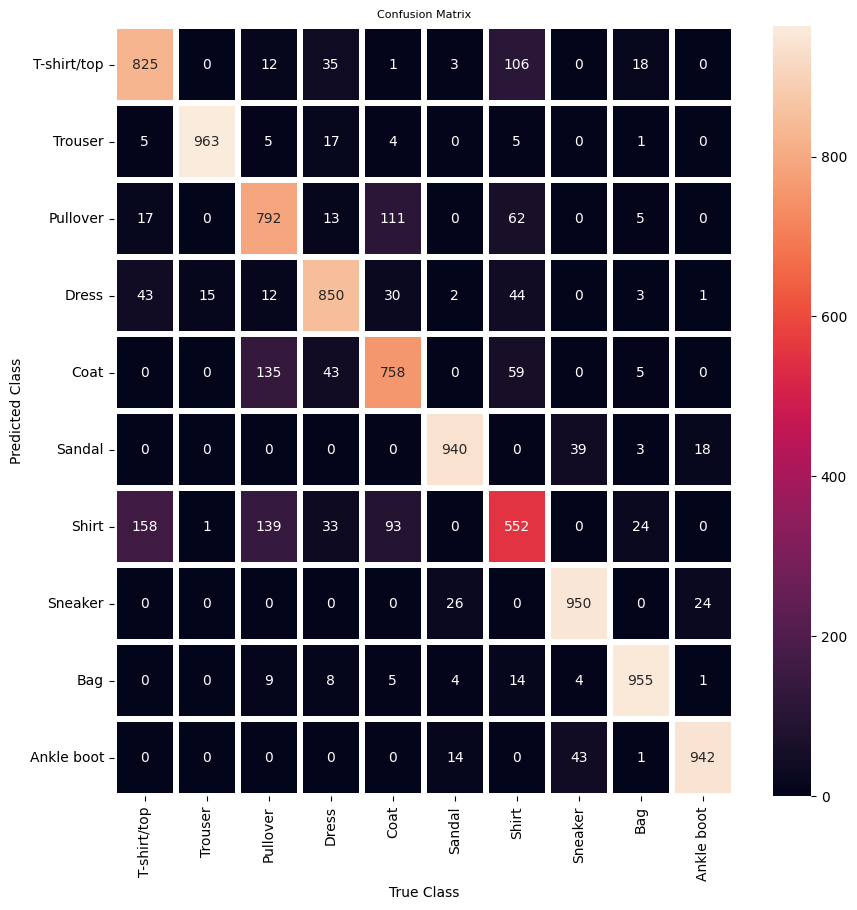

In [47]:
plot_confusion_matrix(model.neural_network.dataset)


# **Question - 8**

In [ ]:
sweep_config_que8 = {
    'method' : 'grid',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'sweep1_crossEntropy_vs_mse_final',

    'parameters' : {
        'epochs' : {'values' : [10]},
        'activation' : {'values' : ['tanh', 'ReLU']},
        'batch_size' : {'values' : [64]},
        'optimizer' : {'values' : ['momentum', 'nag', 'nadam', 'adam', 'rmsprop', 'sgd']},
        'weight_decay': {'values': [0]},
        'hidden_layer_sizes' : {'values' : [32, 64]},
        'beta': {'values': [0.9]}, #rmsprop
        'beta1' : {'values' : [0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'initialization':{'values': ['Xavier']},
        'hidden_layers': {'values': [4, 5]},
        'loss_function' : {'values' : ['cross_entropy', 'mean_squared_error']},
        'epsilon' : {'values' : [1e-6]},
        'momentum' : {'values' : [0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [ ]:
sweep_id_que8 = wandb.sweep(sweep_config_que8, project="DL_Assignment1")
wandb.agent(sweep_id_que8, train)
wandb.finish()

# **Question 10**

In [52]:
# Helper Function
def train_model_on_mnist(PARAM_NEURAL_NETWORK, PARAM_OPTIMIZER, batch_size, epochs):
    neural_network_mnist = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer_mnist = Optimizer(neural_network_mnist, PARAM_OPTIMIZER)

    my_model_mnist = Train_Model(neural_network_mnist, optimizer_mnist, log = 0, console = 0)
    my_model_mnist.fit_data(batch_size, epochs)
    loss, accuracy = my_model_mnist.compute_performance(my_model_mnist.neural_network.test_img, my_model_mnist.neural_network.test_true)
    print(f"Test Data Loss : {loss}, Test Data Accuracy : {accuracy}")

# Model-1

In [48]:
MODEL1_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 3,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL1_PARAM_OPTIMIZER = {
    "eta": 0.005,
    "optimizer": "sgd", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 1e-8,
    "epsilon": 1e-6,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}


# Model - 2

In [49]:
MODEL2_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 3,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL2_PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "momentum", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}


# Model - 3

In [50]:
MODEL3_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 4,
    "hidden_layer_sizes" : 64,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL3_PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "rmsprop", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}

# Test Loss & Test Accuracy on MNIST_DATASET

In [53]:
# Training different Models
train_model_on_mnist(MODEL1_PARAM_NEURAL_NETWORK, MODEL1_PARAM_OPTIMIZER, 32, 10)
train_model_on_mnist(MODEL2_PARAM_NEURAL_NETWORK, MODEL2_PARAM_OPTIMIZER, 32, 10)
train_model_on_mnist(MODEL3_PARAM_NEURAL_NETWORK, MODEL3_PARAM_OPTIMIZER, 32, 10)


Test Data Loss : 0.1838192928817245, Test Data Accuracy : 94.08999999999999
